**Problem Statement:**
*Use Keras to build and train a deep neural network for handwritten digit classification (MNIST). Visualize training history.*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [3]:
# Step 1: Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

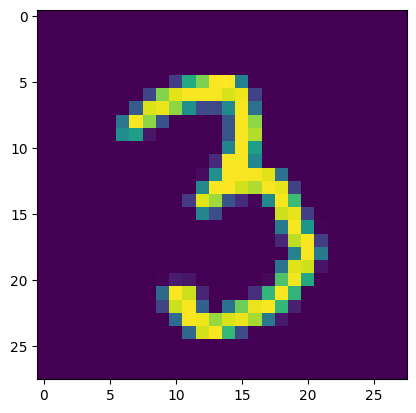

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[30000])

In [6]:
# make the values of X_traun and X_test between 0 to 1, divided by 255
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#to_categorical() -> converts numeric labels (0–9) into one-hot vectors.
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [7]:
# build ANN model
model = Sequential()

model.add(Flatten(input_shape =(28, 28)))

model.add(Dense(units=512, activation='relu'))
BatchNormalization ()
model.add(Dropout(0.3))

model.add(Dense(units=256, activation='relu'))
BatchNormalization ()
model.add(Dropout(0.3))

model.add(Dense(units=128, activation='relu'))
BatchNormalization ()
model.add(Dropout(0.3))

model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit (X_train, y_train_cat,
  epochs =10,
  batch_size =128,
  validation_split =0.2,
  verbose=1
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7753 - loss: 0.7060 - val_accuracy: 0.9585 - val_loss: 0.1408
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9501 - loss: 0.1695 - val_accuracy: 0.9690 - val_loss: 0.1054
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9654 - loss: 0.1160 - val_accuracy: 0.9721 - val_loss: 0.0946
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9719 - loss: 0.0931 - val_accuracy: 0.9758 - val_loss: 0.0829
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9774 - loss: 0.0758 - val_accuracy: 0.9744 - val_loss: 0.0874
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9781 - loss: 0.0693 - val_accuracy: 0.9772 - val_loss: 0.0801
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9813 - loss: 0.0590 - val_accuracy: 0.9782 - val_loss: 0.0806
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9828 - loss: 0.0540 - val_acc

In [10]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [11]:
# Step 5: Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test_cat , verbose =0)
print (f"Test Accuracy : { test_acc:.4f}")

Test Accuracy : 0.9789


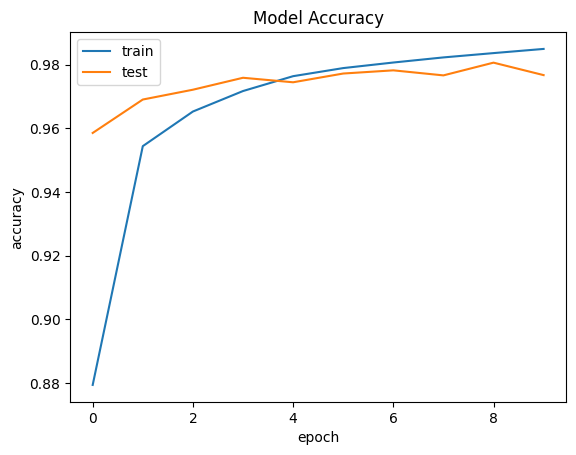

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

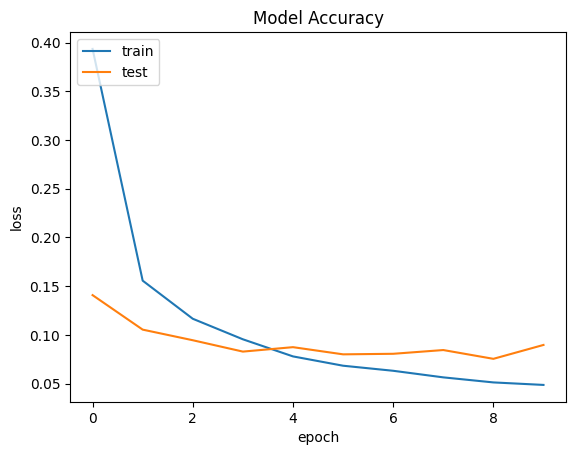

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()